In [1]:
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
who_source  = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")
who_source  = who_source .rename(columns={"Country":"country", "Date_reported":"date" })


In [ ]:
who_source.shape

(176802, 8)

In [ ]:
df.isnull().sum()

date                   0
Country_code         742
country                0
WHO_region             0
New_cases              0
Cumulative_cases       0
New_deaths             0
Cumulative_deaths      0
dtype: int64

In [3]:
path='/content/drive/MyDrive/Asad data/covid-19 /country_vaccinations.csv'

In [4]:
vaccine_source = pd.read_csv(path)
vaccine_source.head(2)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...


In [5]:
path='/content/drive/MyDrive/Asad data/covid-19 /world population/archive (1).zip'
directory_to_extract_to='/content/drive/MyDrive/Asad data/covid-19 /world population/'

In [6]:
import zipfile
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [7]:
path_popilation='/content/drive/MyDrive/Asad data/covid-19 /world population/2021_population.csv'

In [8]:
population_source=pd.read_csv(path_popilation)
population_source.shape

(224, 9)

In [9]:
population_source

,iso_code,country,2021_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
0,CHN,China,"1,446,748,066","1,439,323,776","9,706,961 sq_km",149/sq_km,0.34%,18.34%,1
1,IND,India,"1,400,430,722","1,380,004,385","3,287,590 sq_km",424/sq_km,0.97%,17.69%,2
2,USA,United States,"333,931,112","331,002,651","9,372,610 sq_km",36/sq_km,0.58%,4.23%,3
3,IDN,Indonesia,"277,850,697","273,523,615","1,904,569 sq_km",145/sq_km,1.04%,3.51%,4
4,PAK,Pakistan,"227,443,651","220,892,340","881,912 sq_km",255/sq_km,1.95%,2.86%,5
...,...,...,...,...,...,...,...,...,...
219,MSR,Montserrat,"4,977","4,992",102 sq_km,49/sq_km,-0.30%,0.00%,228
220,FLK,Falkland Islands,"3,533","3,480","12,173 sq_km",0/sq_km,1.52%,0.00%,229
221,NIU,Niue,"1,619","1,626",260 sq_km,6/sq_km,-0.43%,0.00%,230
222,TKL,Tokelau,"1,373","1,357",12 sq_km,114/sq_km,1.18%,0.00%,231


In [10]:
population_source = population_source.rename(columns={'2021_last_updated': 'population'})
population_source

,iso_code,country,population,2020_population,area,density_sq_km,growth_rate,world_%,rank
0,CHN,China,"1,446,748,066","1,439,323,776","9,706,961 sq_km",149/sq_km,0.34%,18.34%,1
1,IND,India,"1,400,430,722","1,380,004,385","3,287,590 sq_km",424/sq_km,0.97%,17.69%,2
2,USA,United States,"333,931,112","331,002,651","9,372,610 sq_km",36/sq_km,0.58%,4.23%,3
3,IDN,Indonesia,"277,850,697","273,523,615","1,904,569 sq_km",145/sq_km,1.04%,3.51%,4
4,PAK,Pakistan,"227,443,651","220,892,340","881,912 sq_km",255/sq_km,1.95%,2.86%,5
...,...,...,...,...,...,...,...,...,...
219,MSR,Montserrat,"4,977","4,992",102 sq_km,49/sq_km,-0.30%,0.00%,228
220,FLK,Falkland Islands,"3,533","3,480","12,173 sq_km",0/sq_km,1.52%,0.00%,229
221,NIU,Niue,"1,619","1,626",260 sq_km,6/sq_km,-0.43%,0.00%,230
222,TKL,Tokelau,"1,373","1,357",12 sq_km,114/sq_km,1.18%,0.00%,231


In [ ]:
vaccine_source.shape,population_source.shape,df.shape

((66330, 15), (224, 9), (176802, 8))

In [11]:
population_source.head()

,iso_code,country,population,2020_population,area,density_sq_km,growth_rate,world_%,rank
0,CHN,China,"1,446,748,066","1,439,323,776","9,706,961 sq_km",149/sq_km,0.34%,18.34%,1
1,IND,India,"1,400,430,722","1,380,004,385","3,287,590 sq_km",424/sq_km,0.97%,17.69%,2
2,USA,United States,"333,931,112","331,002,651","9,372,610 sq_km",36/sq_km,0.58%,4.23%,3
3,IDN,Indonesia,"277,850,697","273,523,615","1,904,569 sq_km",145/sq_km,1.04%,3.51%,4
4,PAK,Pakistan,"227,443,651","220,892,340","881,912 sq_km",255/sq_km,1.95%,2.86%,5


In [12]:
set(df.country) - set(population_source.country)

NameError: ignored

In [13]:
toedit = {"Antigua And Barbuda": 'Antigua and Barbuda',
 "Bolivia": 'Bolivia (Plurinational State of)',
 "Bosnia And Herzegovina": 'Bosnia and Herzegovina',
 "Brunei": 'Brunei Darussalam',
 "Cape Verde": 'Cabo Verde',
 "Curacao": 'Curaçao',
 "North Korea": "Democratic People's Republic of Korea",
 "Republic Of The Congo": 'Democratic Republic of the Congo',
 "Falkland Islands": 'Falkland Islands (Malvinas)',
 "Guinea Bissau": 'Guinea-Bissau',
 "Iran": 'Iran (Islamic Republic of)',
 "Isle Of Man": 'Isle of Man',
 "Laos": "Lao People's Democratic Republic",
 "Micronesia": 'Micronesia (Federated States of)',
 "Northern Mariana Islands": 'Northern Mariana Islands (Commonwealth of the)',
 "South Korea": 'Republic of Korea',
 "Moldova": 'Republic of Moldova',
 "Russia": 'Russian Federation',
 "Reunion": 'Réunion',
 "Saint Kitts And Nevis": 'Saint Kitts and Nevis',
 "Saint Pierre And Miquelon": 'Saint Pierre and Miquelon',
 "Saint Vincent And The Grenadines": 'Saint Vincent and the Grenadines',
 "Sao Tome And Principe": 'Sao Tome and Principe',
 "Syria": 'Syrian Arab Republic',
 "United Kingdom": 'The United Kingdom',
 "Timor Leste": 'Timor-Leste',
 "Trinidad And Tobago": 'Trinidad and Tobago',
 "Turks And Caicos Islands": 'Turks and Caicos Islands',
 "Tanzania": 'United Republic of Tanzania',
 "United States": 'United States of America',
 "Venezuela": 'Venezuela (Bolivarian Republic of)',
 "Vietnam": 'Viet Nam',
 "Wallis And Futuna": 'Wallis and Futuna',
 "Palestine": 'occupied Palestinian territory, including east Jerusalem'}
population_source["country"] = population_source["country"].replace(toedit)
vaccine_source["country"] = vaccine_source["country"].replace(toedit)

In [14]:
who = who_source[["date", "country","New_deaths"]]
population = population_source[["iso_code","country", "population"]]
vaccine = vaccine_source[["country","iso_code","date","total_vaccinations","people_vaccinated","people_fully_vaccinated"]]
# We drop rows with NaN value at this stage from  vaccine data frame
vaccine = vaccine.dropna().reset_index(drop=True)

In [15]:
who_population_merge = pd.merge(who, population)
who_population_merge.head(2)

,date,country,New_deaths,iso_code,population
0,2020-01-03,Afghanistan,0,AFG,"40,314,623"
1,2020-01-04,Afghanistan,0,AFG,"40,314,623"


In [16]:
df = pd.merge(vaccine,who_population_merge).reset_index(drop=True)
df.head(2)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population
0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,"40,314,623"
1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,"40,314,623"


In [17]:
def f_1(row):
    row.population = row.population.replace(',','')
    return row
df=df.apply(f_1, axis=1)
df.population = df.population.astype("float64")
df.people_vaccinated = df.people_vaccinated.astype("float64")

In [18]:
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population
0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40314623.0
1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40314623.0
2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40314623.0
3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40314623.0
4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40314623.0
...,...,...,...,...,...,...,...,...
26618,Zimbabwe,ZWE,2021-12-22,7167610.0,4078945.0,3088665.0,14,15214555.0
26619,Zimbabwe,ZWE,2021-12-23,7188128.0,4089315.0,3098813.0,9,15214555.0
26620,Zimbabwe,ZWE,2021-12-24,7200776.0,4095685.0,3105091.0,27,15214555.0
26621,Zimbabwe,ZWE,2021-12-25,7209049.0,4100069.0,3108980.0,16,15214555.0


In [19]:
df = df.assign(ratio=[0]*len(df))
def f_2(row):
    row.ratio = row.people_vaccinated / row.population * 100 
    return row
df=df.apply(f_2, axis=1)

In [20]:
df.head(8)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40314623.0,1.113437
1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40314623.0,1.166676
2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40314623.0,1.181623
3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40314623.0,1.189077
4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40314623.0,1.189578
5,Afghanistan,AFG,2021-05-30,600152.0,480226.0,119926.0,20,40314623.0,1.191196
6,Afghanistan,AFG,2021-06-02,626290.0,481690.0,144600.0,34,40314623.0,1.194827
7,Afghanistan,AFG,2021-06-03,630305.0,481800.0,148505.0,27,40314623.0,1.195100


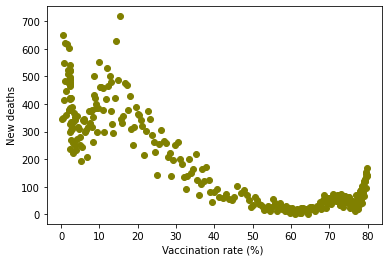

In [ ]:
mydf= df
mydf = mydf[mydf.country == "Italy"]
plt.scatter( mydf.ratio , mydf.New_deaths, color='olive')
plt.xlabel("Vaccination rate (%) ")
plt.ylabel("New deaths")
plt.show()

In [22]:
saving_path_combined_csv='/content/drive/MyDrive/Asad data/covid-19 /world population/ratioed.csv'

In [23]:
df.to_csv(saving_path_combined_csv)

In [ ]:
mydf=pd.read_csv(path_popilation)

In [26]:
df.to_csv('/content/drive/MyDrive/Asad data/covid-19 /world population/final_ratioed.csv')

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(mydf[['ratio']])
train_y = np.asanyarray(mydf[['New_deaths']])
regr.fit (train_x, train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)



Coefficients:  [[-4.94406738]]
Intercept:  [398.59356959]


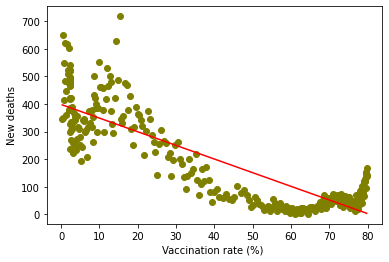

In [ ]:
plt.scatter(mydf.ratio, mydf.New_deaths,  color='olive')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], color='red')
plt.xlabel("Vaccination rate (%) ")
plt.ylabel("New deaths")
plt.show()

**model Evaluation**

In [ ]:
test_x = np.asanyarray(mydf[['ratio']])
test_y = np.asanyarray(mydf[['New_deaths']])
pred = regr.predict(test_x)

In [ ]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(pred - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((pred - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , pred) )

Mean absolute error: 65.93
Residual sum of squares (MSE): 7038.03
R2-score: 0.75
